# MEDICARE DRUG ANALYSIS

In [318]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_ind

In [350]:
#import data

ptd_org = pd.read_csv(r"E:\Medicare\Medicare part d spending by drugs\DSD_PTD_RY25_P04_V10_DY23_BGM.csv")
ptb_org = pd.read_csv(r"E:\Medicare\Medicare part b spending by drugs\DSD_PTB_RY25_P06_V10_DYT23_HCPCS- 250430.csv")

In [351]:
ptd_org.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2019,Tot_Dsg_Unts_2019,Tot_Clms_2019,Tot_Benes_2019,Avg_Spnd_Per_Dsg_Unt_Wghtd_2019,Avg_Spnd_Per_Clm_2019,...,Tot_Spndng_2023,Tot_Dsg_Unts_2023,Tot_Clms_2023,Tot_Benes_2023,Avg_Spnd_Per_Dsg_Unt_Wghtd_2023,Avg_Spnd_Per_Clm_2023,Avg_Spnd_Per_Bene_2023,Outlier_Flag_2023,Chg_Avg_Spnd_Per_Dsg_Unt_22_23,CAGR_Avg_Spnd_Per_Dsg_Unt_19_23
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,139201.68,642471.0,5392.0,1878.0,0.216788,25.816335,...,44355.04,195672.0,1613,699.0,0.227162,27.498475,63.454993,0.0,0.005702,0.011754
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,343031.42,1830596.0,14581.0,5319.0,0.187389,23.525919,...,97951.18,406617.0,3269,1267.0,0.240932,29.963652,77.309534,0.0,0.022165,0.064848
4,Abacavir,Abacavir Sulfate,5,Overall,10110328.45,3316293.0,42629.0,6085.0,3.482725,237.170200,...,5287295.41,1648593.0,19632,2809.0,3.594357,269.320263,1882.269637,0.0,-0.071481,0.007919


In [355]:
ptd = ptd_org.copy()
ptb = ptb_org.copy()

## EXPLORE

In [364]:
#Basic Information

ptd_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14309 entries, 0 to 14308
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        14309 non-null  object 
 1   Gnrc_Name                        14309 non-null  object 
 2   Tot_Mftr                         14309 non-null  int64  
 3   Mftr_Name                        14309 non-null  object 
 4   Tot_Spndng_2019                  14309 non-null  float64
 5   Tot_Dsg_Unts_2019                10104 non-null  float64
 6   Tot_Clms_2019                    10104 non-null  float64
 7   Tot_Benes_2019                   10017 non-null  float64
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2019  10104 non-null  float64
 9   Avg_Spnd_Per_Clm_2019            10104 non-null  float64
 10  Avg_Spnd_Per_Bene_2019           9910 non-null   float64
 11  Outlier_Flag_2019                10102 non-null  float64
 12  Tot_Spndng_2020   

In [361]:
# Counts of unique entities
ptd_org["drug_id"] = ptd_org["Brnd_Name"] + " (" + ptd_org["Gnrc_Name"] + ")"
print("Rows:", len(ptd_org))
print("Unique drugs:", ptd_org["drug_id"].nunique())
print("Unique manufacturers:", ptd_org["Mftr_Name"].nunique())

year_cols = [c for c in ptd_org.columns if c.startswith("Tot_Spndng_")]
print("Years covered:", [c[-4:] for c in year_cols])

Rows: 14309
Unique drugs: 3598
Unique manufacturers: 962
Years covered: ['2019', '2020', '2021', '2022', '2023']


In [362]:
#Missing values 

key_patterns = [
    "Tot_Spndng_", "Tot_Dsg_Unts_", "Tot_Clms_", "Tot_Benes_",
    "Avg_Spnd_Per_Dsg_Unt_Wghtd_", "Avg_Spnd_Per_Clm_", "Avg_Spnd_Per_Bene_"
]

for pat in key_patterns:
    cols = [c for c in ptd.columns if c.startswith(pat)]
    print(f"\nPattern {pat}")
    print(ptd_org[cols].isna().sum())


Pattern Tot_Spndng_
Tot_Spndng_2019    0
Tot_Spndng_2020    0
Tot_Spndng_2021    0
Tot_Spndng_2022    0
Tot_Spndng_2023    0
dtype: int64

Pattern Tot_Dsg_Unts_
Tot_Dsg_Unts_2019    4205
Tot_Dsg_Unts_2020    3258
Tot_Dsg_Unts_2021    2278
Tot_Dsg_Unts_2022    1326
Tot_Dsg_Unts_2023       0
dtype: int64

Pattern Tot_Clms_
Tot_Clms_2019    4205
Tot_Clms_2020    3258
Tot_Clms_2021    2278
Tot_Clms_2022    1326
Tot_Clms_2023       0
dtype: int64

Pattern Tot_Benes_
Tot_Benes_2019    4292
Tot_Benes_2020    3435
Tot_Benes_2021    2590
Tot_Benes_2022    1730
Tot_Benes_2023     762
dtype: int64

Pattern Avg_Spnd_Per_Dsg_Unt_Wghtd_
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    4205
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    3258
Avg_Spnd_Per_Dsg_Unt_Wghtd_2021    2278
Avg_Spnd_Per_Dsg_Unt_Wghtd_2022    1326
Avg_Spnd_Per_Dsg_Unt_Wghtd_2023       0
dtype: int64

Pattern Avg_Spnd_Per_Clm_
Avg_Spnd_Per_Clm_2019    4205
Avg_Spnd_Per_Clm_2020    3258
Avg_Spnd_Per_Clm_2021    2278
Avg_Spnd_Per_Clm_2022    1326
Avg_Spnd

In [363]:
# zero-division checks

for yr in range(2019, 2024):
    units_col = f"Tot_Dsg_Unts_{yr}"
    if units_col in ptd.columns:
        zeros = (ptd_org[units_col] == 0).sum()
        print(f"Zero dose units in {units_col}: {zeros}")

Zero dose units in Tot_Dsg_Unts_2019: 0
Zero dose units in Tot_Dsg_Unts_2020: 0
Zero dose units in Tot_Dsg_Unts_2021: 0
Zero dose units in Tot_Dsg_Unts_2022: 0
Zero dose units in Tot_Dsg_Unts_2023: 0


## CLEANING

In [382]:
# Identify Spending Columns
spend_cols_d = [c for c in ptd.columns if "Tot_Spndng_" in c]
spend_cols_b = [c for c in ptb.columns if "Tot_Spndng_" in c]

# Handle Missing Values (Fill Spending Columns with 0)
ptd[spend_cols_d] = ptd[spend_cols_d].fillna(0)
ptb[spend_cols_b] = ptb[spend_cols_b].fillna(0)

# Clean Manufacturer Names (Uppercase, Strip, Remove Symbols)
ptd["Mftr_Name_clean"] = (
    ptd["Mftr_Name"]
      .str.upper()
      .str.strip()
      .str.replace(r"[^A-Z0-9 ]", "", regex=True)
)

# # Remove unwanted aggregate rows (e.g., "OVERALL")
ptd = ptd[ptd["Mftr_Name_clean"] != "OVERALL"]

# Brand vs generic flag – simple rule: brand if names differ
ptd["brand_flag"] = np.where(
    ptd["Brnd_Name"].str.upper() != ptd["Gnrc_Name"].str.upper(),
    "Brand",
    "Generic"
)


# Drug ID for grouping
ptd["drug_id"] = ptd["Brnd_Name"] + " (" + ptd["Gnrc_Name"] + ")"

def billions(x, pos):
    return f'${x/1e9:.1f}B'
def pct(x, pos):
    return f"{x*100:.0f}%"


## SHAPE

In [367]:
# Create drug_id 
ptd["drug_id"] = ptd["Brnd_Name"] + " (" + ptd["Gnrc_Name"] + ")"

years = [2019, 2020, 2021, 2022, 2023]

# Build long-form melted table
value_vars = []
metrics = [
    "Tot_Spndng", "Tot_Dsg_Unts", "Tot_Clms", "Tot_Benes",
    "Avg_Spnd_Per_Dsg_Unt_Wghtd", "Avg_Spnd_Per_Clm",
    "Avg_Spnd_Per_Bene", "Outlier_Flag"
]

for m in metrics:
    for y in years:
        value_vars.append(f"{m}_{y}")

id_vars = ["drug_id", "Brnd_Name", "Gnrc_Name", "Mftr_Name_clean"]

long = ptd[id_vars + value_vars].melt(
    id_vars=id_vars,
    var_name="metric_year",
    value_name="value"
)

# Split the metric and year
long[["metric", "year"]] = long["metric_year"].str.rsplit("_", n=1, expand=True)
long["year"] = long["year"].astype(int)

# Pivot so each row = drug_id × year
partd_long = long.pivot_table(
    index=["drug_id", "Brnd_Name", "Gnrc_Name", "Mftr_Name_clean", "year"],
    columns="metric",
    values="value"
).reset_index()

# Rename columns
partd_long = partd_long.rename(columns={
    "Tot_Spndng": "tot_spend",
    "Tot_Dsg_Unts": "dose_units",
    "Tot_Clms": "claims",
    "Tot_Benes": "benes",
    "Avg_Spnd_Per_Dsg_Unt_Wghtd": "ppd",  # price per dose
    "Avg_Spnd_Per_Clm": "ppc",
    "Avg_Spnd_Per_Bene": "ppb",
    "Outlier_Flag": "outlier_flag"
})


In [368]:
partd_long.head()

metric,drug_id,Brnd_Name,Gnrc_Name,Mftr_Name_clean,year,ppb,ppc,ppd,outlier_flag,benes,claims,dose_units,tot_spend
0,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2019,74.122300,25.816335,0.216788,0.0,1878.0,5392.0,642471.0,139201.68
1,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2020,74.560025,26.682351,0.217701,0.0,1595.0,4457.0,547006.0,118923.24
2,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2021,77.898522,27.583808,0.223001,0.0,1313.0,3708.0,459384.0,102280.76
3,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2022,61.063304,28.004642,0.225874,0.0,1147.0,2501.0,310304.0,70039.61
4,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2023,63.454993,27.498475,0.227162,0.0,699.0,1613.0,195672.0,44355.04


# ANALYZE

### Size: What is total spend by year and drug? By manufacturer?

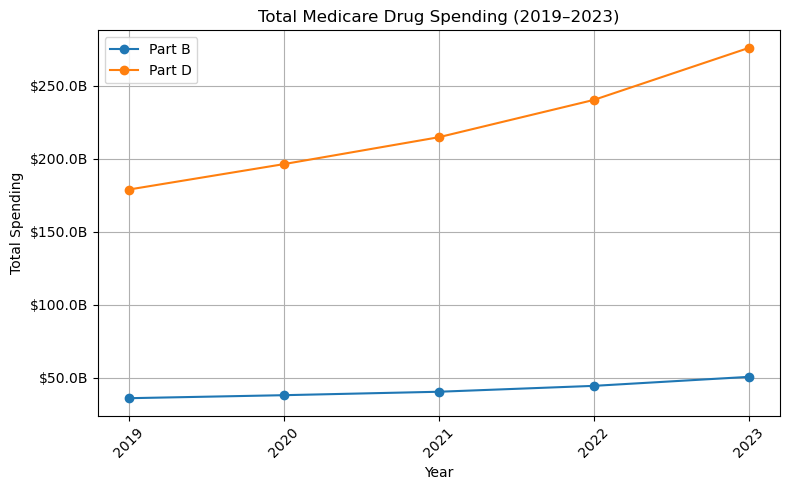

In [377]:
# Total Medicare Drug Spending (2019–2023)

def billions(x, pos):
    return f'${x/1e9:.1f}B'

ptb_yearly = ptb[spend_cols_b].sum()
ptd_yearly = ptd[spend_cols_d].sum()

# Plot
plt.figure(figsize=(8,5))
plt.plot(
    ptb_yearly.index.str[-4:], 
    ptb_yearly.values, 
    marker="o", label="Part B"
)

plt.plot(
    ptd_yearly.index.str[-4:], 
    ptd_yearly.values, 
    marker="o", 
    label="Part D")

# Add titles and labels
plt.title("Total Medicare Drug Spending (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Total Spending")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Format Y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions))

plt.tight_layout()
plt.show()


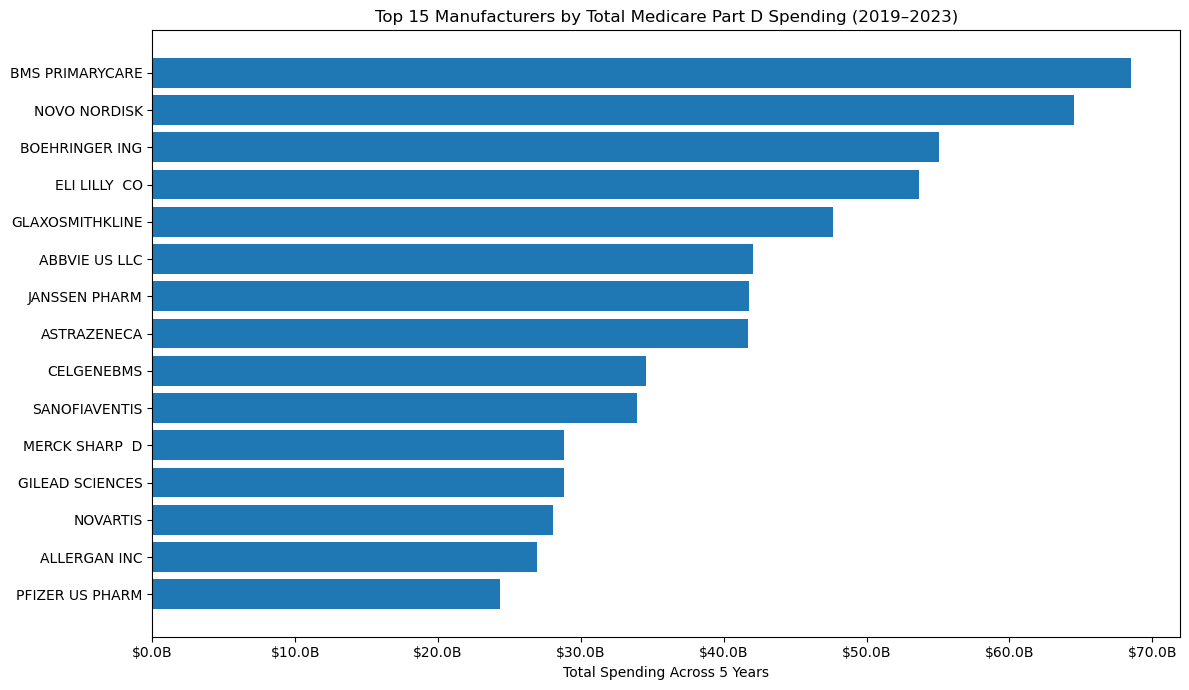

In [379]:
# Top 15 Manufacturers by Total Medicare Part D Spending (2019–2023)

years = [2019, 2020, 2021, 2022, 2023]
spend_cols = [f"Tot_Spndng_{yr}" for yr in years]

mftr_total_5yr = (
    ptd.groupby("Mftr_Name_clean")[spend_cols]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
    .head(15)
)

# Plot
plt.figure(figsize=(12,7))
plt.barh(
    mftr_total_5yr.index, 
    mftr_total_5yr.values
)

# Add titles and labels
plt.title("Top 15 Manufacturers by Total Medicare Part D Spending (2019–2023)")
plt.xlabel("Total Spending Across 5 Years")

# Format X-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions))

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


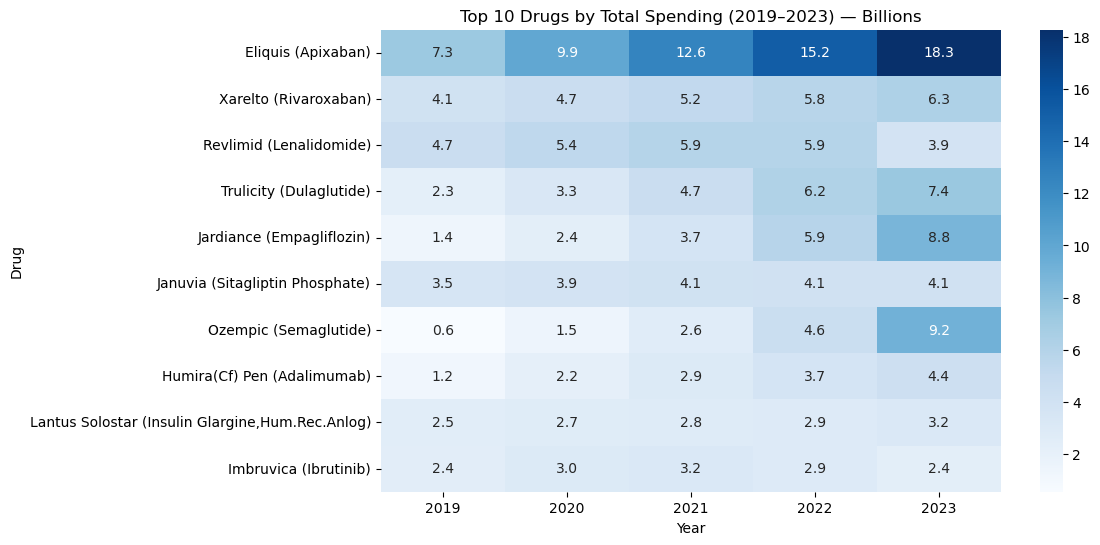

In [383]:
# Top 10 Drugs by Total Spending (2019–2023)

years = [2019, 2020, 2021, 2022, 2023]
spending_cols = [f"Tot_Spndng_{y}" for y in years]

# Get spending by drug
df = ptd.groupby("drug_id")[spending_cols].sum()

# Keep top 10 drugs overall
top10_drugs = (
              df.sum(axis=1)
                .sort_values(ascending=False)
                .head(10)
                .index
)
df_top10 = df.loc[top10_drugs]

# Rename columns to just the year
df_top10.columns = years

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(df_top10 / 1e9, annot=True, cmap="Blues", fmt=".1f")
plt.title("Top 10 Drugs by Total Spending (2019–2023) — Billions")
plt.xlabel("Year")
plt.ylabel("Drug")
plt.show()


### Price: How is average price per dose unit changing? Per claim? Per beneficiary?

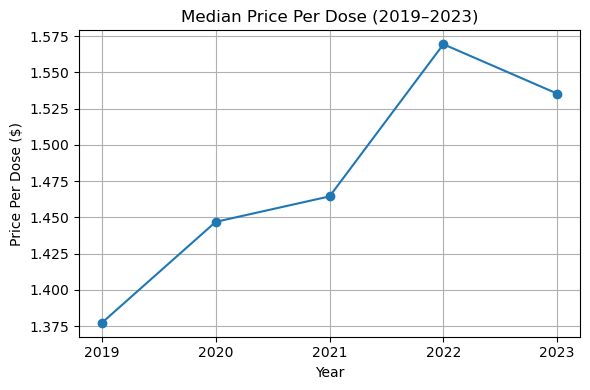

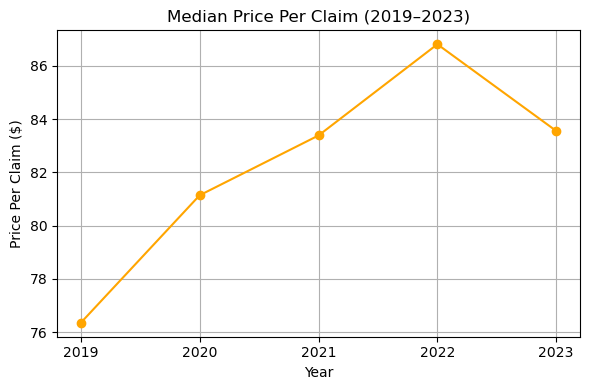

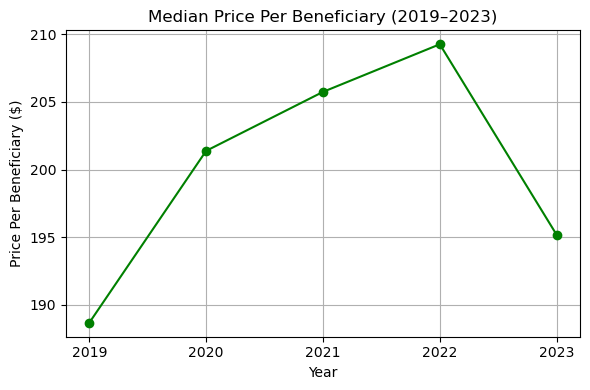

In [385]:
# Compute Median Price Per Dose (PPD) by Year
ppd_trend = partd_long.groupby("year")["ppd"].median()

# Plot
plt.figure(figsize=(6,4))
plt.plot(ppd_trend.index, ppd_trend.values, marker="o")
plt.title("Median Price Per Dose (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Price Per Dose ($)")
plt.xticks(ppd_trend.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute Median Price Per Claim (PPC) by Year
ppc_trend = partd_long.groupby("year")["ppc"].median()

# Plot
plt.figure(figsize=(6,4))
plt.plot(ppc_trend.index, ppc_trend.values, marker="o", color="orange")
plt.title("Median Price Per Claim (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Price Per Claim ($)")
plt.xticks(ppd_trend.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute Median Price Per Beneficiary (PPB) by Year
ppb_trend = partd_long.groupby("year")["ppb"].median()

# Plot
plt.figure(figsize=(6,4))
plt.plot(ppb_trend.index, ppb_trend.values, marker="o", color="green")
plt.title("Median Price Per Beneficiary (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Price Per Beneficiary ($)")
plt.xticks(ppd_trend.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()


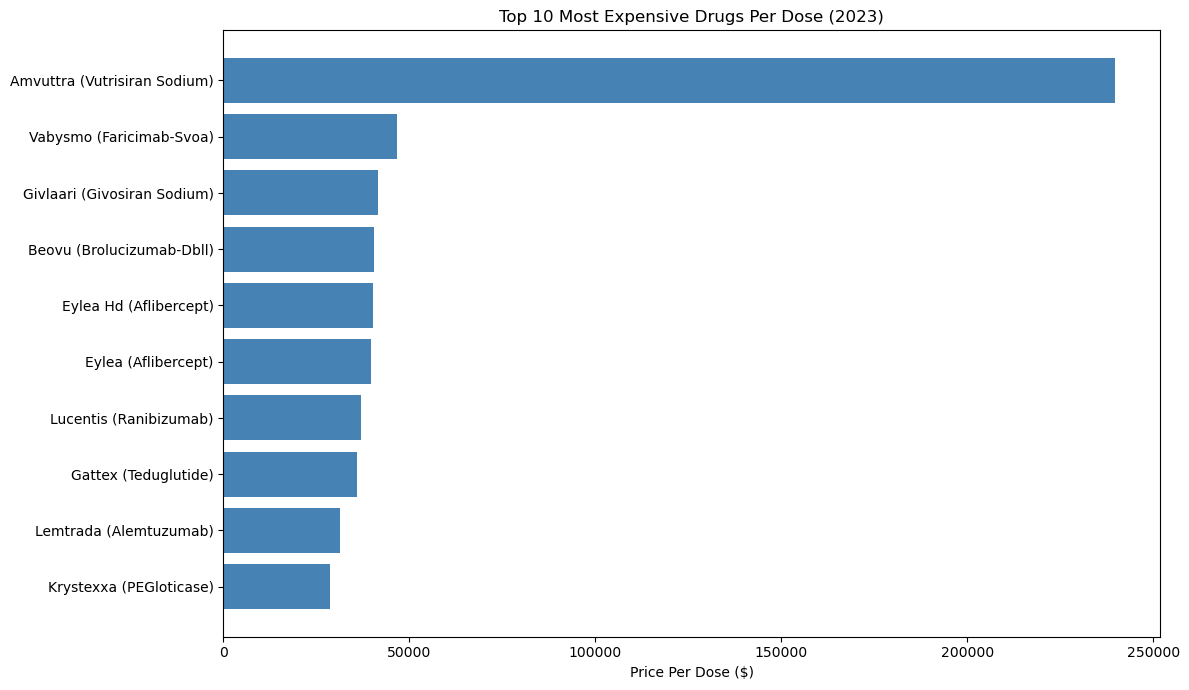

In [409]:
# Most Expensive Drugs in 2023 (PPD)

expensive = (
    partd_long[partd_long["year"] == 2023]
    .sort_values("ppd", ascending=False)
    .head(10)
    [["drug_id", "ppd"]]
)

plt.figure(figsize=(12,7))
plt.barh(expensive["drug_id"], expensive["ppd"], color="steelblue")
plt.xlabel("Price Per Dose ($)")
plt.title("Top 10 Most Expensive Drugs Per Dose (2023)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Mix: What is the brand vs. generic share and how is it shifting?

In [387]:
# Create Brand vs. Generic Flags (Wide Table - ptd)
ptd["brand_flag"] = ptd["Brnd_Name"].ne(ptd["Gnrc_Name"]).astype(int)
ptd["gen_flag"] = 1 - ptd["brand_flag"]

# Create Brand vs. Generic Flags (Long Table - partd_long)
partd_long["brand"] = (partd_long["Brnd_Name"] != partd_long["Gnrc_Name"]).astype(int)
partd_long["generic"] = 1 - partd_long["brand"]

In [388]:
partd_long.head()

metric,drug_id,Brnd_Name,Gnrc_Name,Mftr_Name_clean,year,ppb,ppc,ppd,outlier_flag,benes,claims,dose_units,tot_spend,ppd_yoy,brand,generic
0,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2019,74.122300,25.816335,0.216788,0.0,1878.0,5392.0,642471.0,139201.68,NaN,1,0
1,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2020,74.560025,26.682351,0.217701,0.0,1595.0,4457.0,547006.0,118923.24,0.004212,1,0
2,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2021,77.898522,27.583808,0.223001,0.0,1313.0,3708.0,459384.0,102280.76,0.024346,1,0
3,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2022,61.063304,28.004642,0.225874,0.0,1147.0,2501.0,310304.0,70039.61,0.012882,1,0
4,"1st Tier Unifine Pentips (Pen Needle, Diabetic)",1st Tier Unifine Pentips,"Pen Needle, Diabetic",OWEN MUMFORD US,2023,63.454993,27.498475,0.227162,0.0,699.0,1613.0,195672.0,44355.04,0.005702,1,0


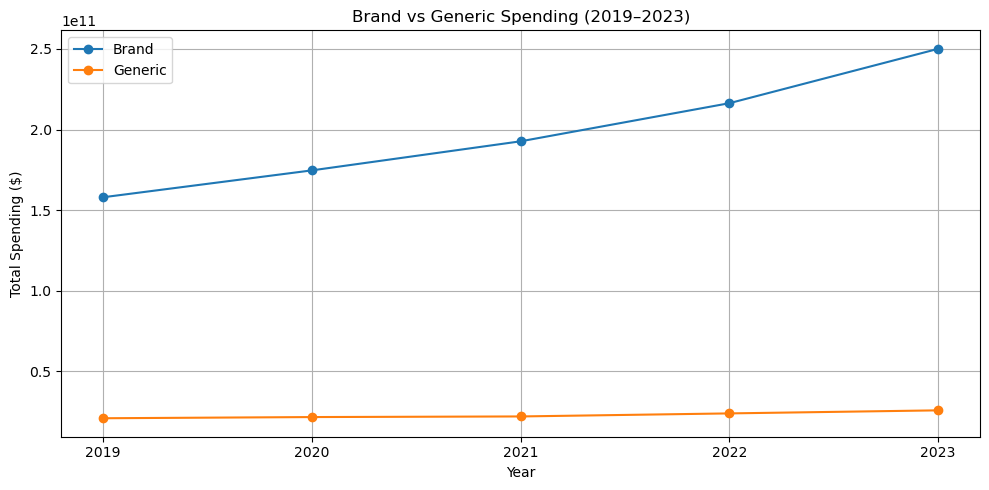

In [389]:
# Brand vs Generic Spending (2019–2023)

# Aggregate Total Spending by Year and Drug Type (Brand/Generic)
mix_spend = (
    partd_long.groupby(["year", "brand"])["tot_spend"]
    .sum()
    .reset_index()
)

# Map numeric brand flag → readable labels
mix_spend["type"] = mix_spend["brand"].map({1: "Brand", 0: "Generic"})

# Plot
plt.figure(figsize=(10,5))

for t in ["Brand", "Generic"]:
    subset = mix_spend[mix_spend["type"] == t]
    plt.plot(subset["year"], subset["tot_spend"], marker="o", label=t)

# Add titles and labels 
plt.title("Brand vs Generic Spending (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Total Spending ($)")
plt.xticks(sorted(mix_spend["year"].unique()))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


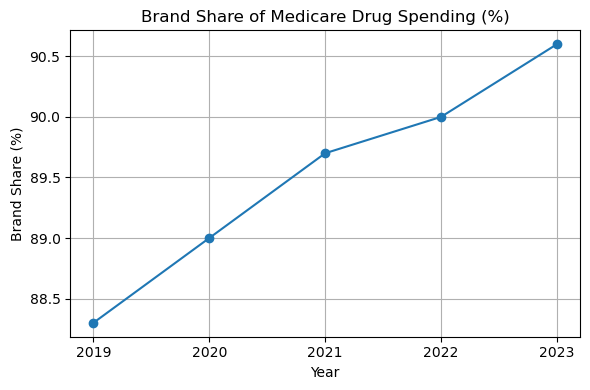

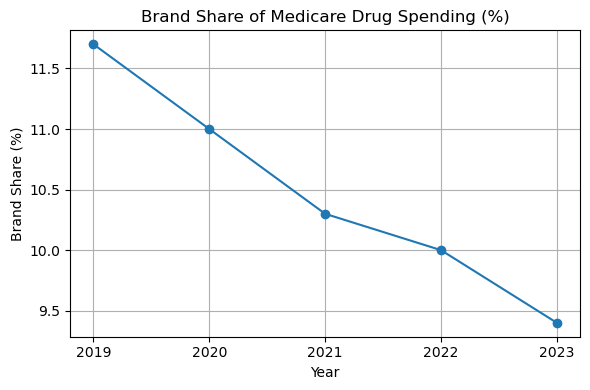

In [390]:
# Calculate Brand Share (%)

# Compute Total Spending per Year (All Drugs)
total_spend = partd_long.groupby("year")["tot_spend"].sum()

# Compute Total Spending per Year for Brand and Generic Drugs
brand_spend = (
    partd_long[partd_long["brand"] == 1]
    .groupby("year")["tot_spend"]
    .sum()
)

generic_spend = (
    partd_long[partd_long["brand"] == 0]
    .groupby("year")["tot_spend"]
    .sum()
)

# Calculate Market Share (Brand % vs Generic %)
brand_share = (brand_spend / total_spend * 100).round(1)
generic_share = (generic_spend / total_spend * 100).round(1)

brand_share, generic_share

# Plot
plt.figure(figsize=(6,4))
plt.plot(brand_share.index, brand_share.values, marker="o")
plt.title("Brand Share of Medicare Drug Spending (%)")
plt.xlabel("Year")
plt.ylabel("Brand Share (%)")
plt.xticks(brand_share.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(generic_share.index, generic_share.values, marker="o")
plt.title("Brand Share of Medicare Drug Spending (%)")
plt.xlabel("Year")
plt.ylabel("Brand Share (%)")
plt.xticks(brand_share.index.astype(int))
plt.grid(True)
plt.tight_layout()
plt.show()


In [391]:
# Substitution Ratio

# Substitution Ratio = Generic Claims / Brand Claims

claims_by_type = (
    partd_long.groupby(["year", "brand"])["claims"]
    .sum()
    .reset_index()
)

# Map brand flag → readable labels
claims_by_type["type"] = claims_by_type["brand"].map({1: "Brand", 0: "Generic"})

# Separate Brand and Generic Claims by Year
brand_claims = (
    claims_by_type[claims_by_type["type"] == "Brand"]
    .set_index("year")["claims"]
)

generic_claims = (
    claims_by_type[claims_by_type["type"] == "Generic"]
    .set_index("year")["claims"]
)

# Compute Substitution Ratio
sub_ratio = (generic_claims / brand_claims).round(2)
sub_ratio


year
2019    1.25
2020    1.28
2021    1.29
2022    1.28
2023    1.26
Name: claims, dtype: float64

In [392]:
# Split brand vs generic price-per-dose
brand_ppd = partd_long[partd_long["brand"] == 1]["ppd"].dropna()
generic_ppd = partd_long[partd_long["brand"] == 0]["ppd"].dropna()

# Perform Independent Two-Sample t-test
t_stat, p_value = ttest_ind(brand_ppd, generic_ppd, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 14.235354610667892
P-value: 8.031474344943114e-46


### Outliers: Which products trigger the outlier flag and why?

In [341]:
partd_long["outlier_flag"] = partd_long["outlier_flag"].fillna(0).astype(int)


In [342]:
# Count Outlier Drugs per Year
outlier_count = (
    partd_long.groupby("year")["outlier_flag"]
    .sum()
)

outlier_count

year
2019     571
2020     663
2021     830
2022    1014
2023    1480
Name: outlier_flag, dtype: int64

In [393]:
# Identify ALL Outlier Drugs (Any Year 2019–2023)

outliers_all = (
    partd_long[partd_long["outlier_flag"] == 1]
    .groupby("drug_id")
    .agg({
        "year": "nunique",
        "ppd": "mean",
        "tot_spend": "sum",
        "Mftr_Name_clean": "first"
    })
    .rename(columns={"year": "years_flagged"})
    .sort_values("years_flagged", ascending=False)
)

outliers_all.head(10)


metric,years_flagged,ppd,tot_spend,Mftr_Name_clean
drug_id,,,,
Abilify Mycite (Aripiprazole),5,56.880930,3.402343e+05,OTSUKA AMERICA
Zyvox (Linezolid),5,117.824631,1.226451e+06,PHARMACIAUPJHN
Humulin 70-30 (Insulin NPh Hum/Reg Insulin Hm),5,13.130629,6.983242e+08,ELI LILLY CO
Humulin 70/30 Kwikpen (Insulin NPh Hum/Reg Insulin Hm),5,25.578908,5.439213e+08,ELI LILLY CO
Ibandronate Sodium* (Ibandronate Sodium),5,25.652696,1.540130e+08,ALVOGEN INC
Imatinib Mesylate (Imatinib Mesylate),5,39.983795,1.711096e+08,DRREDDYS LAB
"Insulin Syringe (Syringe And Needle,Insulin,1ml)",5,0.248848,3.799970e+03,EXEL INTL INC
Gemcitabine HCl (Gemcitabine HCl),5,36.949036,3.677302e+05,APPPREMIERPRO
Gentamicin Sulfate (Gentamicin Sulfate/PF),5,0.487847,2.063449e+04,FRESENIUSPREMI


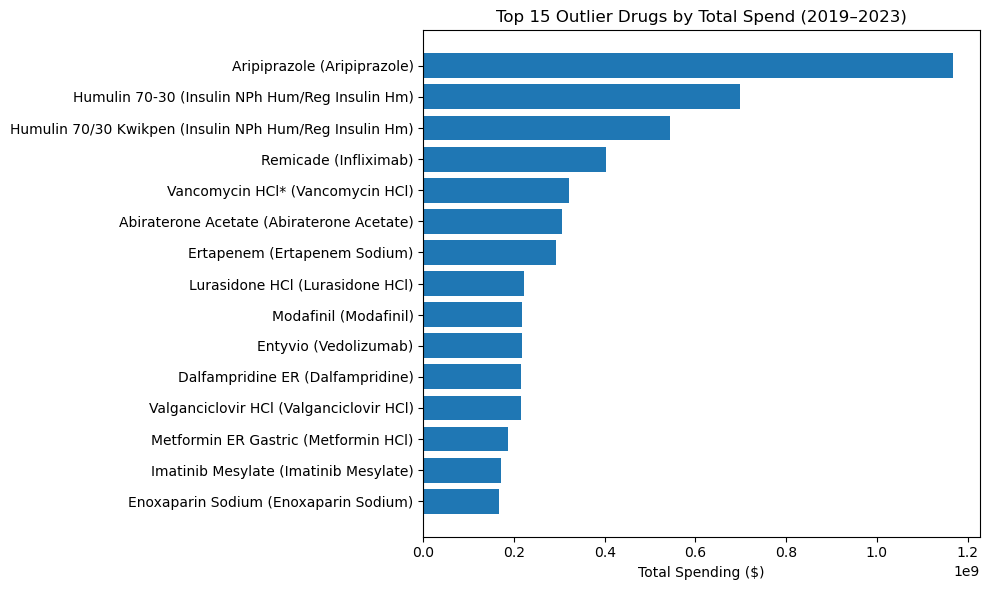

In [395]:
# Top Outlier Drugs (by spending)
top_outliers_spend = (
    partd_long[partd_long["outlier_flag"] == 1]
    .groupby("drug_id")["tot_spend"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_outliers_spend

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_outliers_spend.index, top_outliers_spend.values)
plt.title("Top 15 Outlier Drugs by Total Spend (2019–2023)")
plt.xlabel("Total Spending ($)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [345]:
# Top Outlier Drugs by Price Per Dose
outlier_ppd = (
    partd_long[(partd_long["outlier_flag"] == 1) & (partd_long["year"] == 2023)]
    [["drug_id", "ppd"]]
    .sort_values("ppd", ascending=False)
    .head(15)
)

outlier_ppd


metric,drug_id,ppd
27244,Lemtrada (Alemtuzumab),31448.723699
45619,Spinraza (Nusinersen Sodium/PF),28331.886545
53509,Zynlonta (Loncastuximab Tesirine-Lpyl),25958.690000
9404,Cimerli (Ranibizumab-Eqrn),25496.225130
5099,Besponsa (Inotuzumab Ozogamicin),21107.179268
52669,Yutiq (Fluocinolone Acetonide),9550.967619
5499,Bimzelx (Bimekizumab-Bkzx),7879.908684
48304,Tivdak (Tisotumab Vedotin-Tftv),6639.078302
21129,Fulphila (PEGfilgrastim-Jmdb),6604.023517
52654,Yuflyma(Cf) Autoinjector (Adalimumab-Aaty),6474.043158


In [396]:
# Manufacturers with Highest Outlier Counts
mftr_outlier = (
    partd_long[partd_long["outlier_flag"] == 1]
    .groupby("Mftr_Name_clean")["drug_id"]
    .nunique()
    .sort_values(ascending=False)
    .head(15)
)

mftr_outlier


Mftr_Name_clean
AHP                88
FRESENIUS KABI     53
MAJOR PHARMACEU    49
CHARTWELL RX LL    43
DRREDDYS LAB       42
HOSPIRAPFIZER      42
TEVA USA           40
AMNEAL PHARMACE    36
WESTWARDHIKMA      36
AVKARE             35
MARLEX PHARM       32
SAGENT PHARMACE    32
GSMS INC           30
NORTHSTAR RX LL    30
AUROMEDICSEUGI     30
Name: drug_id, dtype: int64

### Growth: Which drugs have the highest 2019–2023 CAGR in price-per-dose?

drug_id
Magnesium Chloride (Magnesium Chloride)                    4.882384
Amphotericin B Liposome (Amphotericin B Liposome)          2.475088
Lagevrio (Eua) (Molnupiravir)                              2.048490
Recarbrio (Imipenem/Cilastatin/Relebactam)                 1.657735
Bylvay (Odevixibat)                                        1.191645
Gentamicin Sulfate (Gentamicin Sulfate/PF)                 1.072917
Children'S Multivitamin (Pediatric Multivitamin No.17)     1.044498
Rifadin* (Rifampin)                                        1.025019
Clomid (Clomiphene Citrate)                                0.973518
Imipenem-Cilastatin Sodium (Imipenem/Cilastatin Sodium)    0.920204
Name: CAGR_Avg_Spnd_Per_Dsg_Unt_19_23, dtype: float64


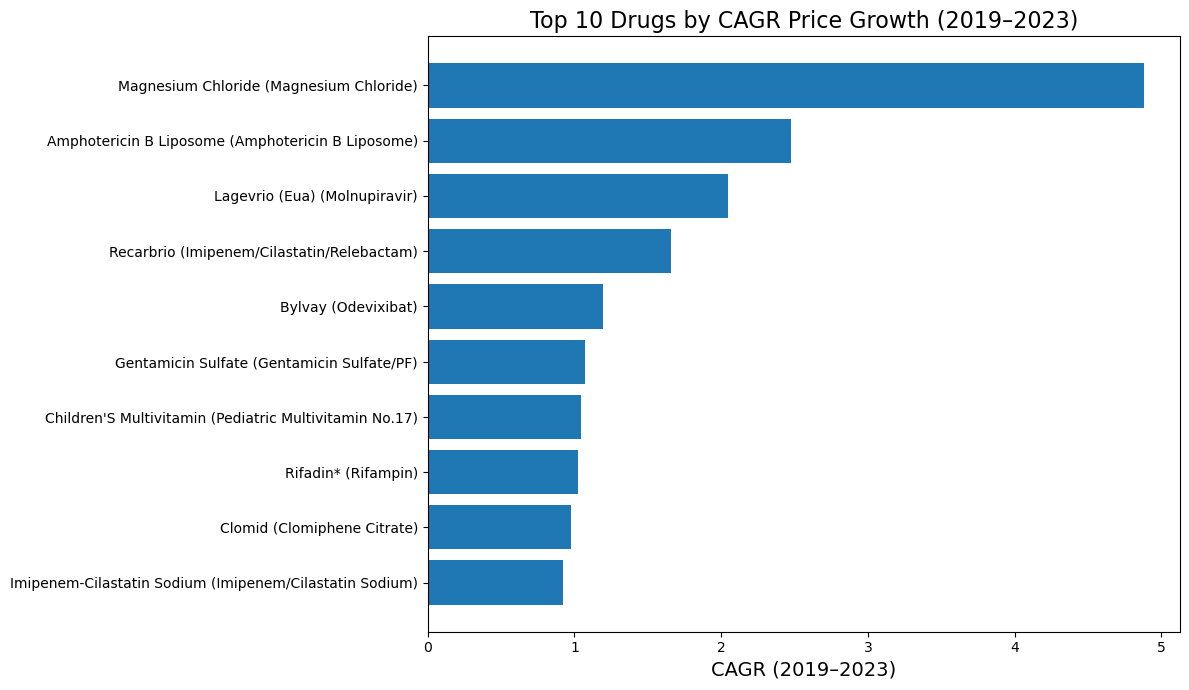

In [347]:
def top10_drugs_by_cagr():
    df = ptd.copy()
    
    # remove missing CAGR values
    df = df[df["CAGR_Avg_Spnd_Per_Dsg_Unt_19_23"].notna()]
    
    # group by drug
    grouped = (
        df.groupby("drug_id")["CAGR_Avg_Spnd_Per_Dsg_Unt_19_23"]
        .mean()   # take max CAGR found for a drug
        .sort_values(ascending=False)
        .head(10)
    )
    
    print(grouped)
    
    # plot
    plt.figure(figsize=(12,7))
    plt.barh(grouped.index[::-1], grouped.values[::-1])
    plt.title("Top 10 Drugs by CAGR Price Growth (2019–2023)", fontsize=16)
    plt.xlabel("CAGR (2019–2023)", fontsize=14)
    plt.tight_layout()
    plt.show()

top10_drugs_by_cagr()


### Price vs. Volume Decomposition (2019 → 2023)

In [348]:
# Aggregate total price per dose and dose units per year
agg = partd_long.groupby("year").agg({
    "tot_spend": "sum",
    "dose_units": "sum",
})

# Compute average price per dose per year
agg["ppd"] = agg["tot_spend"] / agg["dose_units"]

# Pull 2019 and 2023 values
P0, V0 = agg.loc[2019, ["ppd", "dose_units"]]
P1, V1 = agg.loc[2023, ["ppd", "dose_units"]]

# Compute Decomposition
PE = (P1 - P0) * V0        # Price Effect
VE = (V1 - V0) * P0        # Volume Effect
IE = (P1 - P0) * (V1 - V0) # Interaction Effect
delta_spend = agg.loc[2023, "tot_spend"] - agg.loc[2019, "tot_spend"]

PE, VE, IE, delta_spend


print("Total Spending Growth 2019→2023:", round(delta_spend/1e9, 2), "B")
print("Price Effect:", round(PE/1e9, 2), "B")
print("Volume Effect:", round(VE/1e9, 2), "B")
print("Interaction Effect:", round(IE/1e9, 2), "B")

print("\nPercentage Contribution:")
print("Price Effect %:", round(PE / delta_spend * 100, 1), "%")
print("Volume Effect %:", round(VE / delta_spend * 100, 1), "%")
print("Interaction Effect %:", round(IE / delta_spend * 100, 1), "%")


Total Spending Growth 2019→2023: 96.98 B
Price Effect: 55.61 B
Volume Effect: 31.56 B
Interaction Effect: 9.81 B

Percentage Contribution:
Price Effect %: 57.3 %
Volume Effect %: 32.5 %
Interaction Effect %: 10.1 %


### Market Concentration (HHI)

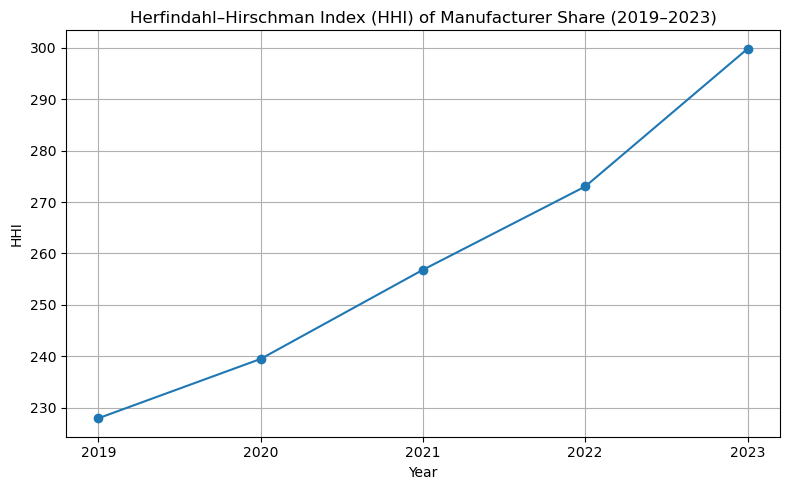

In [349]:
years = [2019, 2020, 2021, 2022, 2023]
hhi_results = {}

for y in years:
    col = f"Tot_Spndng_{y}"
    
    mftr_share = (
        ptd.groupby("Mftr_Name_clean")[col]
        .sum()
        .pipe(lambda x: x / x.sum())  # market share
    )
    
    # HHI = sum( (market_share * 100)^2 )
    hhi = ((mftr_share * 100) ** 2).sum()
    hhi_results[y] = hhi

hhi_results

plt.figure(figsize=(8,5))
plt.plot(list(hhi_results.keys()), list(hhi_results.values()), marker="o")
plt.title("Herfindahl–Hirschman Index (HHI) of Manufacturer Share (2019–2023)")
plt.xlabel("Year")
plt.ylabel("HHI")
plt.xticks(years)
plt.grid(True)
plt.tight_layout()
plt.show()


In [398]:
partd_long.to_csv("medicare_partd_long.csv", index=False)

In [399]:
ptd.to_csv("ptd.csv", index=False)